# NonUS Text Data

35,142 records were classified as NonUS researchers. In previous notebooks, this was accomplished by extracting author addresses and determining which resided in the US and which reside outside the US.

In [1]:
import pandas as pd

import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt

import numpy as np
import scipy

sw = stopwords.words("english")

In [2]:
data=pd.read_csv("Full_NonUS_Records.csv", 
                 usecols= ['Article Title','Source Title','Author Keywords','Abstract',
                          'Times Cited, All Databases','Publisher', 'First_A_Country'])

In [3]:
data

,Article Title,Source Title,Author Keywords,Abstract,"Times Cited, All Databases",Publisher,First_A_Country
0,Spatio-temporal variation in tick community co...,AFRICAN JOURNAL OF ECOLOGY,host availability; human settlement; Rhipiceph...,Human settlement expansion around Nyanga Natio...,0,WILEY,Zimbabwe
1,Sero-prevalence of chlamydiosis in cattle and ...,TROPICAL ANIMAL HEALTH AND PRODUCTION,Chlamydiosis; Abortion; Zoonosis; Cattle; Wild...,A study was conducted to investigate the serop...,5,SPRINGER,Zimbabwe
2,"Interactions between humans, crocodiles, and h...",HUMAN-WILDLIFE INTERACTIONS,African hippopotamus; Crocodylus niloticus; ec...,Human-wildlife conflicts (HWCs) are on the inc...,3,JACK H BERRYMAN INST,Zimbabwe
3,Human-wildlife tourism conflict: towards an in...,GEOJOURNAL,Local communities; Livelihoods; Sustainability...,The study examines wildlife tourism and local ...,0,SPRINGER,Zimbabwe
4,An assessment of human-wildlife conflicts in l...,GLOBAL ECOLOGY AND CONSERVATION,Crop raiding; Human-wildlife conflicts; Local ...,Human-wildlife conflicts (HWCs) occur around t...,22,ELSEVIER,Zimbabwe
...,...,...,...,...,...,...,...
35137,"Combined effects of moderate hypoxia, pesticid...",AQUATIC TOXICOLOGY,Moderate hypoxia; Carp fish; Combined stressor...,"Nowadays, depletion of oxygen or hypoxia has b...",35,ELSEVIER,Albania
35138,Ecological particularities of the critically e...,KNOWLEDGE AND MANAGEMENT OF AQUATIC ECOSYSTEMS,Valencia letourneuxi; Lake Butrinti; conservat...,"The southernmost part of Albania, the Butrinti...",2,EDP SCIENCES S A,Albania
35139,Assessing wildfire vulnerability of vegetated ...,JOURNAL FOR NATURE CONSERVATION,Plant heat zones; Ultramafic; Wildfire ignitio...,The endemic vegetation on serpentine soils is ...,0,ELSEVIER GMBH,Albania
35140,Hunting in Afghanistan: variation in motivatio...,ORYX,Afghanistan; human-wildlife conflict; hunting;...,"Illegal hunting is a widespread problem, with ...",8,CAMBRIDGE UNIV PRESS,Afghanistan


## Sample Composition

In [11]:
countries=data['First_A_Country']

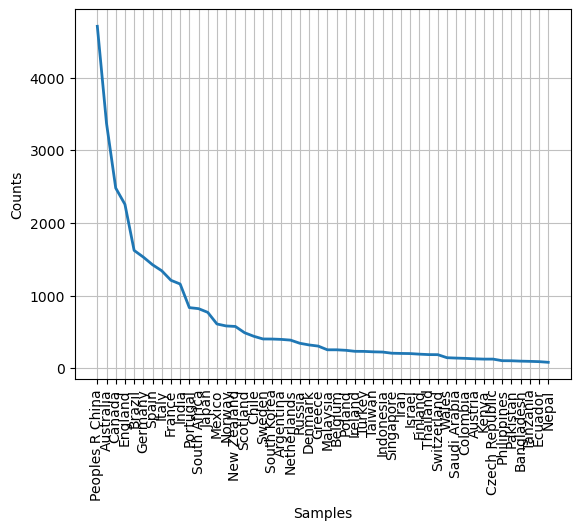

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
fdist=FreqDist(countries)
fdist.plot(50)

## Keyword Data

In [4]:
keywords=data['Author Keywords'] ##saving just the keywords column

In [5]:
keyword_data=[] ##creating a list to store string of data

for item in keywords:  #Make everything in the column  a string of text
    string=str(item)
    keyword_data.append(string)
    
len(keyword_data)

35142

In [6]:
keyword_data[0]

'host availability; human settlement; Rhipicephalus appendiculatus; Rhipicephalus zambeziensis; ticks; wildlife-livestock interaction'

In [15]:
tokens=nltk.word_tokenize(str(keyword_data))

In [16]:
cleaned_tokens=[] ##Space to store clean tokens

for w in tokens:
        if w not tokens=nltk.word_tokenize(str(keyword_data))in sw and w.isalpha(): #Removing tokens including stopwords and punctuation
            cleaned_tokens.append(w.lower())    ##Make everything lowercase


In [17]:
cleaned_tokens[:20]

['availability',
 'human',
 'settlement',
 'rhipicephalus',
 'appendiculatus',
 'rhipicephalus',
 'zambeziensis',
 'ticks',
 'interaction',
 'abortion',
 'zoonosis',
 'cattle',
 'wildlife',
 'hippopotamus',
 'crocodylus',
 'niloticus',
 'economic',
 'hardships',
 'fishing',
 'hippopotamus']

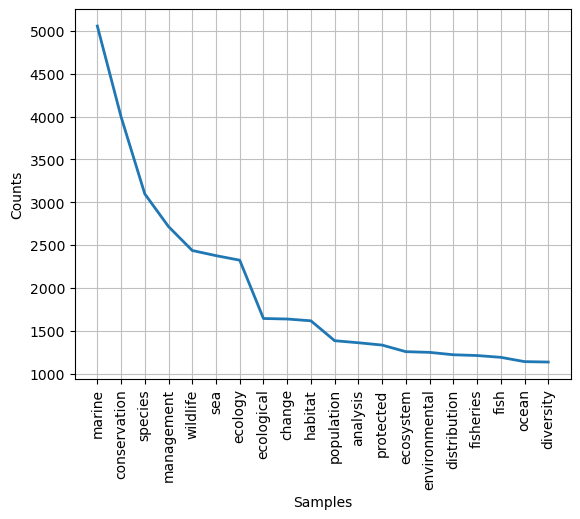

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
#Visualizing the most common keywords

fdist = FreqDist(cleaned_tokens)
    
    
fdist.plot(20)

### Bigrams - Keyword Data

In [27]:
keyword_bigrams=[]

for words in keyword_data:
    tokens = nltk.word_tokenize(words)
    tokens = [t.lower() for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    bi_grams = list(ngrams(tokens, 2))
    
    
    keyword_bigrams.append(bi_grams)

len(keyword_bigrams)
 ##currently bigrams is a list of lists of bigrams

35142

In [28]:
# how to flatten list of lists
 
# using list comprehension
all_keyword_bigrams = [item for sublist in keyword_bigrams for item in sublist]
all_keyword_bigrams

# counting all bigrams
counter = Counter(all_keyword_bigrams)
counter.most_common(30)


[(('protected', 'area'), 1317),
 (('climate', 'change'), 1195),
 (('marine', 'protected'), 833),
 (('stable', 'isotope'), 522),
 (('coral', 'reef'), 516),
 (('specie', 'distribution'), 417),
 (('mediterranean', 'sea'), 396),
 (('ecosystem', 'service'), 389),
 (('fishery', 'management'), 387),
 (('wildlife', 'management'), 360),
 (('wildlife', 'trade'), 355),
 (('risk', 'assessment'), 321),
 (('invasive', 'specie'), 312),
 (('marine', 'ecosystem'), 304),
 (('biodiversity', 'conservation'), 300),
 (('marine', 'mammal'), 276),
 (('endangered', 'specie'), 266),
 (('food', 'web'), 263),
 (('ecological', 'risk'), 262),
 (('spatial', 'planning'), 262),
 (('heavy', 'metal'), 258),
 (('marine', 'conservation'), 251),
 (('citizen', 'science'), 248),
 (('national', 'park'), 239),
 (('threatened', 'specie'), 239),
 (('distribution', 'model'), 226),
 (('remote', 'sensing'), 221),
 (('wildlife', 'conservation'), 212),
 (('camera', 'trap'), 212),
 (('genetic', 'diversity'), 212)]

### Trigrams - Keyword Data

In [30]:
keyword_trigrams=[]

for words in keyword_data:
    tokens = nltk.word_tokenize(words)
    tokens = [t.lower() for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    tri_grams = list(ngrams(tokens, 3))
    
    
    keyword_trigrams.append(tri_grams)


In [32]:
# flatten list of lists
 
# using list comprehension
all_keyword_trigrams = [item for sublist in keyword_trigrams for item in sublist]

# counting all bigrams
counter = Counter(all_keyword_trigrams)
counter.most_common(30)

[(('marine', 'protected', 'area'), 829),
 (('specie', 'distribution', 'model'), 207),
 (('marine', 'spatial', 'planning'), 198),
 (('sic', 'sic', 'sic'), 141),
 (('south', 'china', 'sea'), 114),
 (('illegal', 'wildlife', 'trade'), 111),
 (('ecological', 'risk', 'assessment'), 110),
 (('stable', 'isotope', 'analysis'), 96),
 (('local', 'ecological', 'knowledge'), 95),
 (('harmful', 'algal', 'bloom'), 92),
 (('passive', 'acoustic', 'monitoring'), 87),
 (('protected', 'area', 'marine'), 71),
 (('marine', 'strategy', 'framework'), 69),
 (('strategy', 'framework', 'directive'), 68),
 (('sea', 'surface', 'temperature'), 66),
 (('climate', 'change', 'conservation'), 63),
 (('great', 'barrier', 'reef'), 62),
 (('polycyclic', 'aromatic', 'hydrocarbon'), 61),
 (('vulnerable', 'marine', 'ecosystem'), 60),
 (('specie', 'distribution', 'modelling'), 59),
 (('east', 'china', 'sea'), 54),
 (('specie', 'distribution', 'modeling'), 53),
 (('iucn', 'red', 'list'), 52),
 (('sustainable', 'development', '

## Abstract Data

In [3]:
abstract=data['Abstract']

abstract_strings=[] ##creating a list to store string of data

for item in abstract:  #Make everything in the column  a string of text
    string=str(item)
    abstract_strings.append(string)
       
abstract_strings[1]

'A study was conducted to investigate the seroprevalence and associated risk factors of Chlamydia abortus infection in cattle and some selected wildlife species at selected interface areas at the periphery of the Great Limpopo Transfrontier Conservation Area in Zimbabwe. Three study sites were selected based on the type of livestock-wildlife interface, porous livestock-wildlife interface (unrestricted), non-porous livestock-wildlife interface (restricted by fencing), and livestock-wildlife non-interface (totally absent or control). Sera were collected from cattle aged ae<yen> 2 years representing both female and intact male. Sera were also collected from selected wild ungulates from Mabalauta (porous interface) and Chipinda Pools (non-interface) areas of the Gonarezhou National Park. Sera were tested for antibodies to Chlamydia abortus using a CFT. A X (2) test was used to assess differences between categories and p < 0.05 was considered as significant. In cattle, the overall seropreva

In [34]:
tokens=nltk.word_tokenize(str(abstract_strings)) ##tokenize all of the text strings
len(tokens)


cleaned_tokens=[] ##Space to store clean tokens

for w in tokens:
        if w not in sw and w.isalpha(): #Removing tokens including stopwords and punctuation
            cleaned_tokens.append(w.lower())    ##Make everything lowercase


In [37]:
print(len(tokens))
print(len(cleaned_tokens))

9350108
5069952


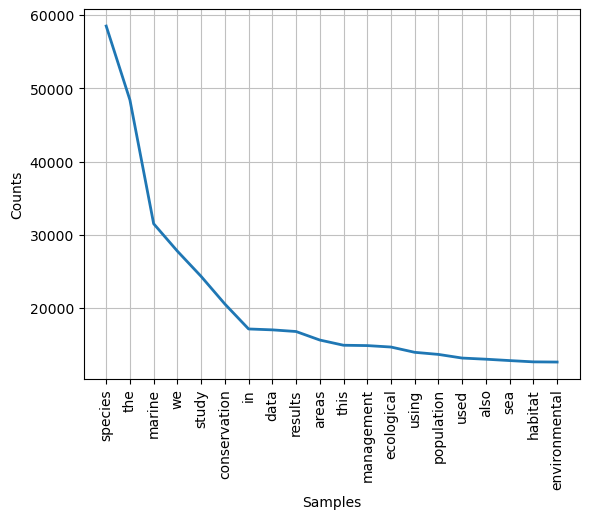

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [38]:
fdist = FreqDist(cleaned_tokens)
    
    
fdist.plot(20)

In [51]:
#removing unnecessary words

additional_stopwords=['the','we','study','in','results','this','using','used','also', 'may','two','high','however','important','found',
                     'our','use','within','across','showed','higher','one','based','three','effects','among','studies']

clean_tokens_2 = []
for token in cleaned_tokens:
    if token not in additional_stopwords:
        clean_tokens_2.append(token)

In [52]:
# counting all tokens
token_counter = Counter(clean_tokens_2)
token_counter.most_common(30)

[('species', 58516),
 ('marine', 31492),
 ('conservation', 20520),
 ('data', 16986),
 ('areas', 15596),
 ('management', 14836),
 ('ecological', 14638),
 ('population', 13629),
 ('sea', 12787),
 ('habitat', 12611),
 ('environmental', 12586),
 ('different', 12517),
 ('wildlife', 12046),
 ('fish', 11389),
 ('populations', 10553),
 ('area', 10180),
 ('potential', 10152),
 ('distribution', 9716),
 ('diversity', 9709),
 ('analysis', 9413),
 ('coastal', 8810),
 ('changes', 8195),
 ('abundance', 8056),
 ('communities', 8015),
 ('spatial', 7986),
 ('water', 7966),
 ('model', 7843),
 ('change', 7742),
 ('time', 7570),
 ('community', 7536)]

## Bigrams - Abstract Data

In [4]:
abstract_bigrams=[]

for words in abstract_strings:
    tokens = nltk.word_tokenize(words)
    tokens = [t.lower() for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    bi_grams = list(ngrams(tokens, 2))
    
    
    abstract_bigrams.append(bi_grams)

len(abstract_bigrams)
 ##currently bigrams is a list of lists of bigrams

35142

In [5]:
# how to flatten list of lists
 
# using list comprehension
all_abstract_bigrams = [item for sublist in abstract_bigrams for item in sublist]

# counting all bigrams
counter = Counter(all_abstract_bigrams)
counter.most_common(30)

[(('this', 'study'), 4941),
 (('protected', 'area'), 4191),
 (('our', 'result'), 3826),
 (('climate', 'change'), 3763),
 (('in', 'study'), 3275),
 (('the', 'result'), 3177),
 (('marine', 'ecosystem'), 2723),
 (('we', 'found'), 2633),
 (('marine', 'environment'), 2322),
 (('in', 'addition'), 1978),
 (('coral', 'reef'), 1932),
 (('we', 'used'), 1925),
 (('degree', 'c'), 1908),
 (('present', 'study'), 1875),
 (('specie', 'richness'), 1710),
 (('we', 'also'), 1679),
 (('result', 'suggest'), 1674),
 (('these', 'result'), 1657),
 (('food', 'web'), 1614),
 (('marine', 'protected'), 1604),
 (('result', 'showed'), 1568),
 (('genetic', 'diversity'), 1460),
 (('ecosystem', 'service'), 1452),
 (('our', 'study'), 1437),
 (('fish', 'specie'), 1430),
 (('result', 'show'), 1418),
 (('national', 'park'), 1412),
 (('study', 'area'), 1406),
 (('environmental', 'condition'), 1371),
 (('human', 'activity'), 1358)]

In [57]:
##Removing some irrelevant bigrams

bad_bigrams=[('we', 'also'), ('in', 'study'),('in', 'addition'),('we', 'used'),('published', 'elsevier'),
('our', 'result'),('we', 'found'),('the', 'result'),('this', 'study'),('our', 'study'), ('degree', 'c'), ('present', 'study')
            ,('result', 'suggest'),('these', 'result'), ('result', 'showed'),('result', 'show'),('study', 'area'),
            ('all', 'right'),('right', 'reserved'),('our', 'finding'),('a', 'total'),('elsevier', 'all'),('c', 'elsevier'),
            ('first', 'time'), ('the', 'present'), ('specie', 'the'),('in', 'contrast'),('the', 'study'),('result', 'indicate'),
            ('important', 'role'), ('study', 'provides')]

clean_abstract_bigrams = []
for bigram in all_abstract_bigrams:
    if bigram not in bad_bigrams:
        clean_abstract_bigrams.append(bigram)

In [58]:
bigram_counter = Counter(clean_abstract_bigrams)
bigram_counter.most_common(30)

[(('protected', 'area'), 4191),
 (('climate', 'change'), 3763),
 (('marine', 'ecosystem'), 2723),
 (('marine', 'environment'), 2322),
 (('coral', 'reef'), 1932),
 (('specie', 'richness'), 1710),
 (('food', 'web'), 1614),
 (('marine', 'protected'), 1604),
 (('genetic', 'diversity'), 1460),
 (('ecosystem', 'service'), 1452),
 (('fish', 'specie'), 1430),
 (('national', 'park'), 1412),
 (('environmental', 'condition'), 1371),
 (('human', 'activity'), 1358),
 (('conservation', 'management'), 1258),
 (('case', 'study'), 1127),
 (('community', 'structure'), 1073),
 (('microbial', 'community'), 1053),
 (('stable', 'isotope'), 1047),
 (('significant', 'difference'), 1041),
 (('sea', 'turtle'), 1026),
 (('mediterranean', 'sea'), 1009),
 (('specie', 'distribution'), 992),
 (('population', 'size'), 991),
 (('habitat', 'use'), 979),
 (('environmental', 'change'), 974),
 (('marine', 'mammal'), 973),
 (('growth', 'rate'), 964),
 (('organic', 'matter'), 959),
 (('marine', 'specie'), 952)]

## Trigrams - Abstract Data

In [6]:
abstract_trigrams=[]

for words in abstract_strings:
    tokens = nltk.word_tokenize(words)
    tokens = [t.lower() for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    tri_grams = list(ngrams(tokens, 3))
    
    
    abstract_trigrams.append(tri_grams)


In [7]:
# flatten list of lists
 
# using list comprehension
all_abstract_trigrams = [item for sublist in abstract_trigrams for item in sublist]

# counting all bigrams
counter = Counter(all_abstract_trigrams)
counter.most_common(30)

[(('marine', 'protected', 'area'), 1592),
 (('all', 'right', 'reserved'), 1345),
 (('elsevier', 'all', 'right'), 1239),
 (('c', 'elsevier', 'all'), 1131),
 (('the', 'present', 'study'), 756),
 (('our', 'result', 'suggest'), 699),
 (('play', 'important', 'role'), 682),
 (('the', 'result', 'showed'), 617),
 (('sea', 'surface', 'temperature'), 571),
 (('protected', 'area', 'mpas'), 526),
 (('our', 'result', 'show'), 525),
 (('part', 'per', 'thousand'), 520),
 (('in', 'present', 'study'), 516),
 (('this', 'study', 'provides'), 487),
 (('c', 'the', 'author'), 435),
 (('temperature', 'degree', 'c'), 408),
 (('the', 'author', 'published'), 395),
 (('the', 'result', 'show'), 391),
 (('author', 'published', 'elsevier'), 390),
 (('south', 'china', 'sea'), 387),
 (('the', 'aim', 'study'), 383),
 (('these', 'result', 'suggest'), 347),
 (('our', 'result', 'indicate'), 345),
 (('stable', 'isotope', 'analysis'), 339),
 (('this', 'study', 'aimed'), 328),
 (('the', 'result', 'study'), 318),
 (('marine'

In [69]:
##Removing irrelevant trigrams

bad_trigrams=[('ciencia', 'ccologica', 'e'),('de', 'ciencia', 'ccologica'),('brasileira', 'de', 'ciencia'),('the', 'result', 'study'),
             ('our', 'result', 'suggest'),('our', 'result', 'show'),('play', 'important', 'role'), ('elsevier', 'all', 'right'),
             ('the', 'result', 'showed'),('all', 'right', 'reserved'),('c', 'the', 'authors'),('the', 'authors', 'published'),
             ('authors', 'published', 'elsevier'),('the', 'result', 'show'),('c', 'elsevier', 'all'),('the', 'present', 'study'),
             ('part', 'per', 'thousand'),('in', 'present', 'study'),('this', 'study', 'provides'),('c', 'the', 'author'),
             ('temperature', 'degree', 'c'),('the', 'author', 'published'),('author', 'published', 'elsevier'),
             ('the', 'aim', 'study'),('the', 'aim', 'study'),('these', 'result', 'suggest'),('our', 'result', 'indicate'),
             ('this', 'study', 'aimed'),('our', 'result', 'showed'),('our', 'finding', 'suggest'),('we', 'also', 'found'),
             ('our', 'result', 'highlight'),('however', 'little', 'known'),('this', 'study', 'highlight'),('this', 'study', 'aim'),
             ('this', 'study', 'investigated'),('our', 'study', 'provides'),('our', 'result', 'provide'),('our', 'result', 'demonstrate'),
             ('c', 'degree', 'c'),('degree', 'c', 'degree'),('in', 'study', 'used'), ('in', 'study', 'investigated'),('c', 'published', 'elsevier'),
             ('in', 'recent', 'year'),('the', 'result', 'indicate')]

clean_abstract_trigrams = []
for trigram in all_abstract_trigrams:
    if trigram not in bad_trigrams:
        clean_abstract_trigrams.append(trigram)

In [70]:
trigram_counter = Counter(clean_abstract_trigrams)
trigram_counter.most_common(30)

[(('marine', 'protected', 'area'), 1592),
 (('sea', 'surface', 'temperature'), 571),
 (('protected', 'area', 'mpas'), 526),
 (('south', 'china', 'sea'), 387),
 (('stable', 'isotope', 'analysis'), 339),
 (('marine', 'spatial', 'planning'), 317),
 (('specie', 'distribution', 'model'), 313),
 (('iucn', 'red', 'list'), 305),
 (('marine', 'food', 'web'), 273),
 (('great', 'barrier', 'reef'), 229),
 (('principal', 'component', 'analysis'), 228),
 (('east', 'china', 'sea'), 228),
 (('play', 'key', 'role'), 227),
 (('protected', 'area', 'mpa'), 215),
 (('higher', 'trophic', 'level'), 212),
 (('operational', 'taxonomic', 'unit'), 208),
 (('potential', 'ecological', 'risk'), 205),
 (('international', 'union', 'conservation'), 199),
 (('union', 'conservation', 'nature'), 199),
 (('generalized', 'linear', 'model'), 194),
 (('home', 'range', 'size'), 193),
 (('coral', 'reef', 'ecosystem'), 192),
 (('effect', 'climate', 'change'), 188),
 (('impact', 'climate', 'change'), 187),
 (('single', 'nucleoti

5007881

## Identifying elements of research design

In [76]:
#Theory in trigrams
trigram_theories=[]

for trigram in clean_abstract_trigrams:
    if 'theory' in trigram:
        trigram_theories.append(trigram)

trigram_theory_counter = Counter(trigram_theories)
trigram_theory_counter.most_common(20)
#This helps me see what theories have been mentioned

[(('optimal', 'foraging', 'theory'), 20),
 (('theory', 'planned', 'behavior'), 13),
 (('metabolic', 'theory', 'ecology'), 12),
 (('theory', 'planned', 'behaviour'), 10),
 (('life', 'history', 'theory'), 6),
 (('population', 'genetic', 'theory'), 6),
 (('foraging', 'theory', 'predicts'), 6),
 (('theory', 'island', 'biogeography'), 6),
 (('path', 'circuit', 'theory'), 5),
 (('energy', 'budget', 'theory'), 5),
 (('budget', 'deb', 'theory'), 5),
 (('we', 'used', 'theory'), 4),
 (('used', 'theory', 'planned'), 4),
 (('used', 'circuit', 'theory'), 4),
 (('appraisal', 'theory', 'emotion'), 4),
 (('optimal', 'control', 'theory'), 4),
 (('optimal', 'escape', 'theory'), 4),
 (('theory', 'ecology', 'mte'), 4),
 (('evolutionary', 'governance', 'theory'), 4),
 (('based', 'ecological', 'theory'), 4)]

In [77]:
#models in bigrams
bigram_theories=[]

for bigram in clean_abstract_bigrams:
    if 'theory' in bigram:
        bigram_theories.append(bigram)

bigram_theory_counter = Counter(bigram_theories)
bigram_theory_counter.most_common(30)

##Less useful, but suggests similar theories as trigrams

[(('ecological', 'theory'), 54),
 (('theory', 'predicts'), 40),
 (('circuit', 'theory'), 30),
 (('foraging', 'theory'), 26),
 (('theory', 'planned'), 23),
 (('metabolic', 'theory'), 22),
 (('network', 'theory'), 21),
 (('theory', 'practice'), 21),
 (('graph', 'theory'), 18),
 (('theory', 'suggests'), 17),
 (('theory', 'change'), 17),
 (('based', 'theory'), 15),
 (('theory', 'we'), 13),
 (('theory', 'ecology'), 13),
 (('the', 'theory'), 11),
 (('theory', 'the'), 11),
 (('predicted', 'theory'), 10),
 (('theory', 'used'), 9),
 (('support', 'theory'), 9),
 (('general', 'theory'), 9)]

In [79]:
#models in trigrams
#Theory in trigrams
trigram_models=[]

for trigram in clean_abstract_trigrams:
    if 'model' in trigram:
        trigram_models.append(trigram)

trigram_model_counter = Counter(trigram_models)
trigram_model_counter.most_common(30)

[(('specie', 'distribution', 'model'), 313),
 (('generalized', 'linear', 'model'), 194),
 (('linear', 'mixed', 'model'), 156),
 (('generalized', 'additive', 'model'), 145),
 (('distribution', 'model', 'sdms'), 84),
 (('ecological', 'niche', 'model'), 63),
 (('habitat', 'suitability', 'model'), 60),
 (('additive', 'model', 'gam'), 58),
 (('hidden', 'markov', 'model'), 56),
 (('logistic', 'regression', 'model'), 49),
 (('mixed', 'effect', 'model'), 44),
 (('generalised', 'linear', 'model'), 44),
 (('food', 'web', 'model'), 43),
 (('additive', 'mixed', 'model'), 42),
 (('generalised', 'additive', 'model'), 41),
 (('spatially', 'explicit', 'model'), 39),
 (('bayesian', 'mixing', 'model'), 38),
 (('earth', 'system', 'model'), 36),
 (('isotope', 'mixing', 'model'), 34),
 (('we', 'used', 'model'), 32),
 (('model', 'the', 'result'), 30),
 (('marine', 'ecosystem', 'model'), 30),
 (('machine', 'learning', 'model'), 29),
 (('model', 'used', 'estimate'), 28),
 (('linear', 'model', 'glm'), 27),
 ((

In [80]:
#models in bigrams

#models in bigrams
bigram_models=[]

for bigram in clean_abstract_bigrams:
    if 'model' in bigram:
        bigram_models.append(bigram)

bigram_model_counter = Counter(bigram_models)
bigram_model_counter.most_common(30)

[(('the', 'model'), 461),
 (('distribution', 'model'), 401),
 (('linear', 'model'), 350),
 (('model', 'used'), 338),
 (('model', 'the'), 227),
 (('mixed', 'model'), 219),
 (('additive', 'model'), 204),
 (('regression', 'model'), 190),
 (('model', 'based'), 186),
 (('our', 'model'), 176),
 (('model', 'specie'), 173),
 (('ecosystem', 'model'), 160),
 (('used', 'model'), 159),
 (('model', 'showed'), 153),
 (('mixing', 'model'), 149),
 (('occupancy', 'model'), 146),
 (('model', 'using'), 146),
 (('model', 'we'), 144),
 (('model', 'result'), 143),
 (('model', 'organism'), 141),
 (('model', 'developed'), 136),
 (('model', 'system'), 130),
 (('population', 'model'), 121),
 (('using', 'model'), 121),
 (('model', 'estimate'), 119),
 (('model', 'prediction'), 112),
 (('model', 'predict'), 108),
 (('model', 'predicted'), 103),
 (('model', 'performance'), 98),
 (('model', 'indicated'), 95)]

In [ ]:
#methods in bigrams

In [83]:
#methods in trigrams

trigram_methods=[]

for trigram in clean_abstract_trigrams:
    if 'method' in trigram:
        trigram_methods.append(trigram)

trigram_methods_counter = Counter(trigram_methods)
trigram_methods_counter.most_common(30)

[(('method', 'we', 'used'), 74),
 (('the', 'proposed', 'method'), 30),
 (('contingent', 'valuation', 'method'), 29),
 (('method', 'a', 'total'), 27),
 (('method', 'the', 'result'), 26),
 (('machine', 'learning', 'method'), 24),
 (('mixed', 'method', 'approach'), 22),
 (('the', 'method', 'applied'), 22),
 (('method', 'we', 'collected'), 20),
 (('the', 'method', 'used'), 20),
 (('method', 'we', 'compiled'), 19),
 (('method', 'we', 'conducted'), 19),
 (('specie', 'delimitation', 'method'), 18),
 (('using', 'two', 'method'), 17),
 (('method', 'in', 'study'), 17),
 (('distance', 'sampling', 'method'), 16),
 (('we', 'applied', 'method'), 15),
 (('method', 'used', 'study'), 15),
 (('data', 'collection', 'method'), 15),
 (('deep', 'learning', 'method'), 15),
 (('fish', 'method', 'we'), 15),
 (('sampling', 'method', 'used'), 14),
 (('commonly', 'used', 'method'), 14),
 (('remote', 'sensing', 'method'), 14),
 (('traditional', 'survey', 'method'), 13),
 (('we', 'present', 'method'), 13),
 (('meth

In [9]:
#analysis in trigrams
trigram_analysis=[]

for trigram in all_abstract_trigrams:
    if 'analysis' in trigram:
        trigram_analysis.append(trigram)

trigram_analysis_counter = Counter(trigram_analysis)
trigram_analysis_counter.most_common(30)

[(('stable', 'isotope', 'analysis'), 339),
 (('principal', 'component', 'analysis'), 228),
 (('component', 'analysis', 'pca'), 89),
 (('canonical', 'correspondence', 'analysis'), 77),
 (('stomach', 'content', 'analysis'), 72),
 (('phylogenetic', 'analysis', 'showed'), 58),
 (('phylogenetic', 'analysis', 'based'), 55),
 (('population', 'viability', 'analysis'), 47),
 (('population', 'genetic', 'analysis'), 41),
 (('analysis', 'molecular', 'variance'), 40),
 (('social', 'network', 'analysis'), 36),
 (('analysis', 'the', 'result'), 36),
 (('our', 'analysis', 'revealed'), 36),
 (('comparative', 'genomic', 'analysis'), 36),
 (('phylogenetic', 'analysis', 'revealed'), 35),
 (('the', 'phylogenetic', 'analysis'), 34),
 (('analysis', 'revealed', 'significant'), 33),
 (('principal', 'coordinate', 'analysis'), 33),
 (('our', 'analysis', 'show'), 32),
 (('isotope', 'analysis', 'sia'), 31),
 (('multivariate', 'statistical', 'analysis'), 30),
 (('molecular', 'phylogenetic', 'analysis'), 30),
 (('red

In [10]:
#analysis in bigrams
bigram_analysis=[]

for bigram in all_abstract_bigrams:
    if 'analysis' in bigram:
        bigram_analysis.append(bigram)

bigram_analysis_counter = Counter(bigram_analysis)
bigram_analysis_counter.most_common(30)

[(('analysis', 'revealed'), 747),
 (('analysis', 'showed'), 655),
 (('phylogenetic', 'analysis'), 576),
 (('isotope', 'analysis'), 404),
 (('our', 'analysis'), 365),
 (('the', 'analysis'), 356),
 (('analysis', 'indicated'), 297),
 (('component', 'analysis'), 240),
 (('network', 'analysis'), 239),
 (('analysis', 'based'), 227),
 (('genetic', 'analysis'), 223),
 (('analysis', 'the'), 218),
 (('multivariate', 'analysis'), 206),
 (('cluster', 'analysis'), 196),
 (('statistical', 'analysis'), 186),
 (('analysis', 'using'), 184),
 (('comparative', 'analysis'), 172),
 (('content', 'analysis'), 166),
 (('molecular', 'analysis'), 158),
 (('analysis', 'show'), 158),
 (('analysis', 'performed'), 132),
 (('analysis', 'used'), 131),
 (('data', 'analysis'), 130),
 (('regression', 'analysis'), 126),
 (('analysis', 'suggested'), 117),
 (('analysis', 'we'), 115),
 (('analysis', 'identified'), 114),
 (('based', 'analysis'), 112),
 (('correspondence', 'analysis'), 109),
 (('correlation', 'analysis'), 107